In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [2]:
data = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_data_2.csv")
data.head(5)

,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight
0,1700106,PLANT16,3,PORT09,V44_3,808,14.30
1,1700106,PLANT16,3,PORT09,V44_3,3188,87.94
2,1700106,PLANT16,3,PORT09,V44_3,2331,61.20
3,1700106,PLANT16,3,PORT09,V44_3,847,16.16
4,1700106,PLANT16,3,PORT09,V44_3,2163,52.34


In [3]:
features = ['Ship_ahead_day_count','Unit_quantity', 'Weight']
X = data[features]

In [4]:
# used for scaling the values it is used to standardize and normalize
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# it is used to fit the values fit-mean and sd for x,transform-subtracts the mean and divide by sd

In [5]:
#n_neighbours-consider the nearest values for local density contamination is the proportion of data
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)

#this fits the lof model to x_scaled predict method predicts the features with -1
y_pred = lof.fit_predict(X_scaled)

is_anomaly = y_pred == -1

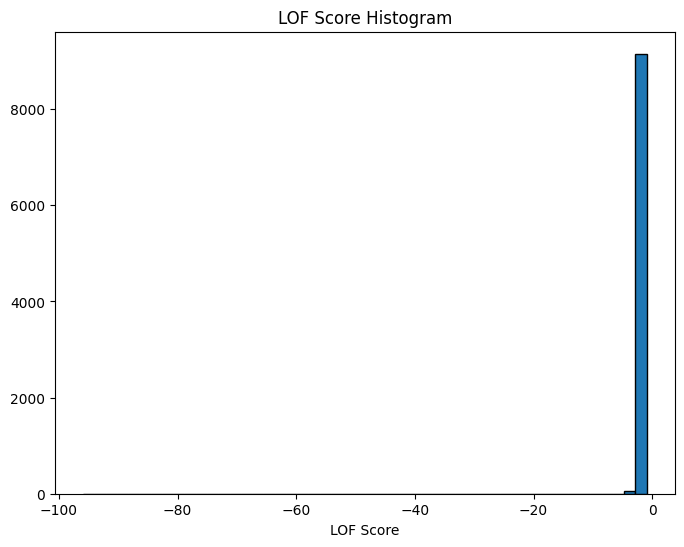

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(lof.negative_outlier_factor_, bins=50, edgecolor='k') #more negative values indicate stronger outliers.
plt.title("LOF Score Histogram")
plt.xlabel("LOF Score")
plt.show()

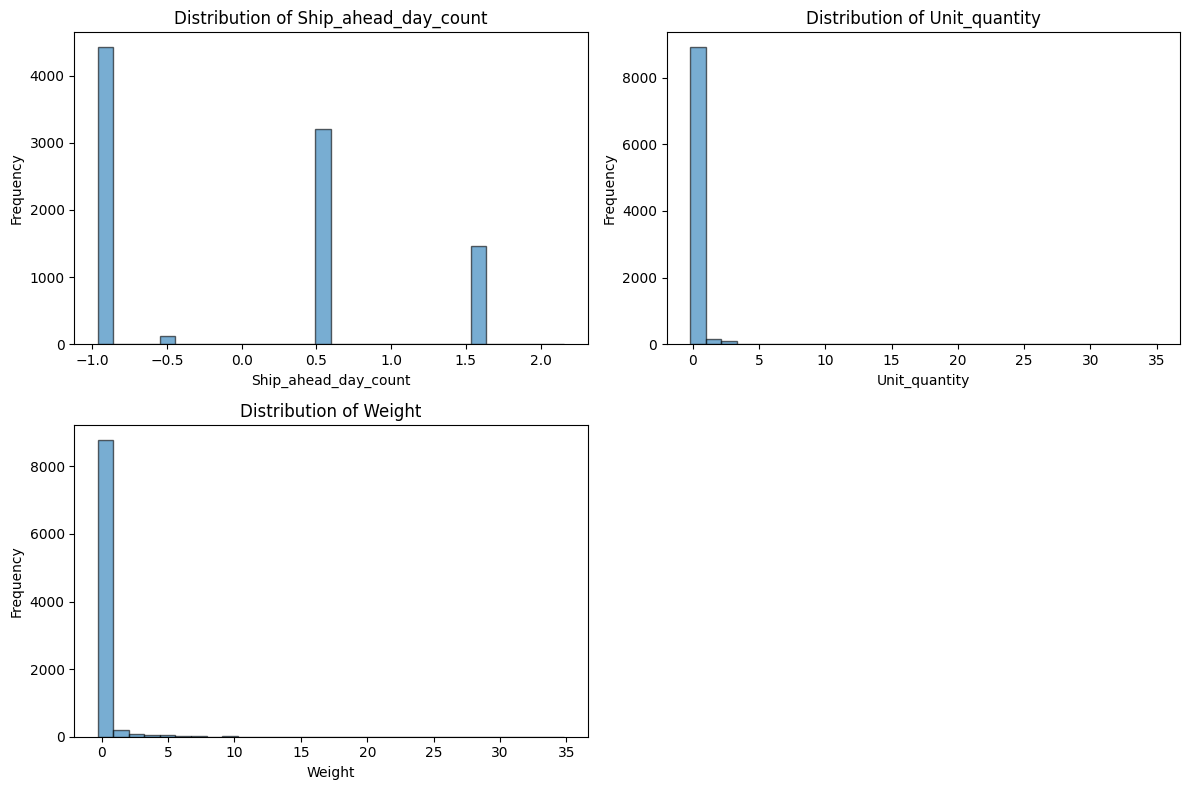

In [7]:
plt.figure(figsize=(12, 8))
for i in range(X_scaled.shape[1]):
    plt.subplot(2, 2, i + 1) #i+1 is to change the subplot position with each iteration
    plt.hist(X_scaled[:, i], bins=30, edgecolor='k', alpha=0.6)
    plt.title(f'Distribution of {features[i]}')
    plt.xlabel(features[i])
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

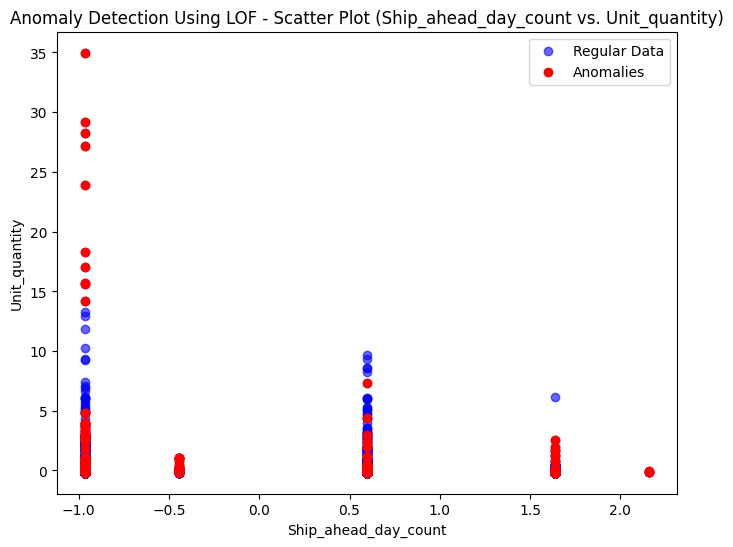

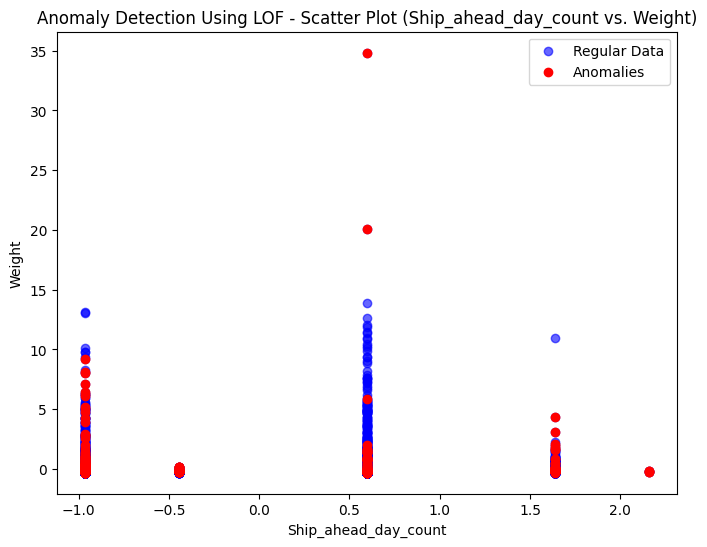

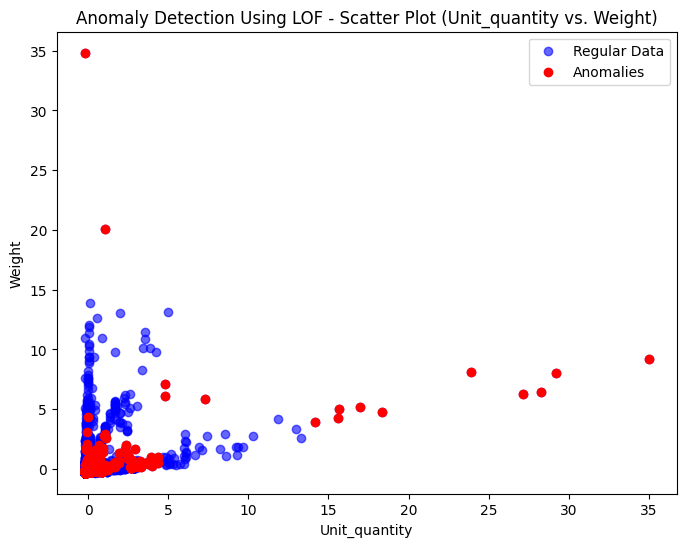

In [8]:
for i in range(len(features) - 1):
    for j in range(i + 1, len(features)):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_scaled[:, i], X_scaled[:, j], c='blue', alpha=0.6, label='Regular Data')
        plt.scatter(X_scaled[is_anomaly, i], X_scaled[is_anomaly, j], c='red', label='Anomalies')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'Anomaly Detection Using LOF - Scatter Plot ({features[i]} vs. {features[j]})')
        plt.legend(loc='upper right')
        plt.show()


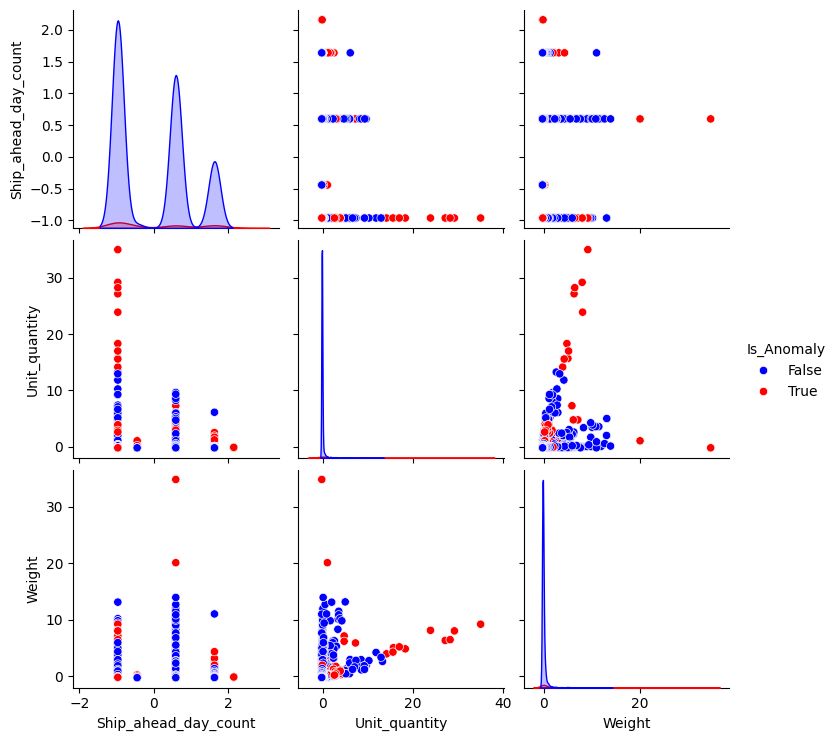

In [9]:
import seaborn as sns
data_with_anomalies = pd.concat([pd.DataFrame(X_scaled, columns=features), pd.DataFrame(is_anomaly, columns=["Is_Anomaly"])], axis=1)

# Create a pairplot with anomalies marked in red
sns.pairplot(data_with_anomalies, hue="Is_Anomaly", palette={0: 'blue', 1: 'red'})
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
# Evaluate precision, recall, F1 score, and accuracy (if you have true labels for anomalies)
true_labels = np.where(y_pred == -1, 1, 0)  # Use LOF predictions as true labels for simplicity
predicted_labels = np.where(y_pred == -1, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Precision, Recall, F1 Score, and Accuracy
precision = precision_score(true_labels, predicted_labels, zero_division=1)
recall = recall_score(true_labels, predicted_labels, zero_division=1)
f1 = f1_score(true_labels, predicted_labels, zero_division=1)
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[8754    0]
 [   0  461]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


In [11]:
# Print indices of outliers
outlier_indices = np.where(y_pred == -1)[0]
print("Indices of outliers:", outlier_indices)

# Print details of outliers
outliers = data.iloc[outlier_indices]
print("Details of outliers:")
print(outliers)

Indices of outliers: [  10   73  141  182  189  246  267  268  270  272  274  275  285  286
  318  325  347  349  353  499  605  607  608  609  610  635  639  644
  650  676  687  689  692  693  695  696  745  775  833  834  836  838
  840  848  855  859  884  989 1008 1055 1075 1077 1080 1084 1086 1261
 1275 1333 1334 1335 1336 1337 1448 1468 1469 1597 1945 2179 2253 2273
 2351 2356 2390 2503 2619 2700 2708 2715 2720 2725 2746 2747 2797 2844
 2866 2883 2891 2895 2896 2931 3064 3066 3067 3158 3275 3276 3278 3283
 3284 3289 3293 3298 3299 3344 3359 3379 3384 3473 3486 3490 3620 3666
 3678 3737 3747 3787 3796 3828 3829 3836 3862 3863 3899 3918 3931 3938
 3945 3987 4065 4066 4069 4074 4086 4093 4095 4102 4105 4107 4114 4117
 4119 4124 4125 4127 4128 4131 4134 4186 4195 4242 4333 4384 4393 4405
 4408 4500 4541 4543 4553 4554 4556 4557 4558 4566 4567 4569 4572 4609
 4638 4723 4724 4774 4775 4860 4864 4931 4934 4937 4939 4955 4989 4992
 5028 5029 5030 5056 5084 5090 5093 5115 5116 5119 5126 